# Evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

### Ergebnisse

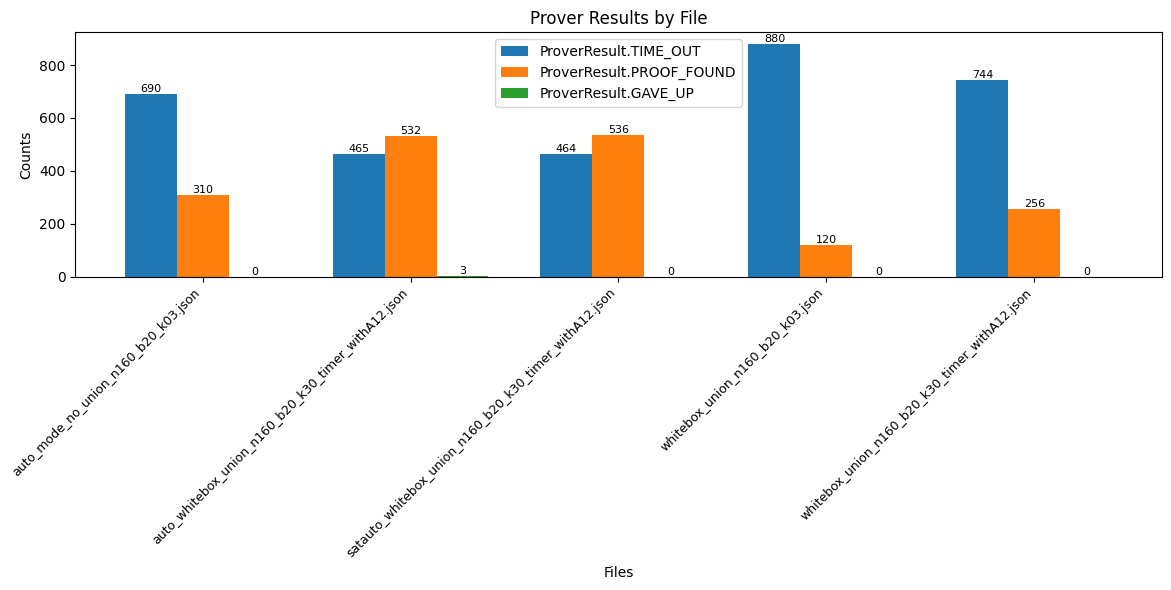

In [55]:
with open('./summary_timer_A12.json', 'r') as file:
    data = json.load(file)
    
# Result categories
categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

# Extract data for plotting
files = list(data.keys())
n_files = len(files)
n_categories = len(categories)

# Initialize an array for category counts
category_counts = np.zeros((n_files, n_categories), dtype=int)

# Fill the category counts
for i, (file, results) in enumerate(data.items()):
    for j, category in enumerate(categories):
        # Get the count for each category, defaulting to 0 if not present
        category_counts[i, j] = results.get(category, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(n_files)

# Plot a bar for each category
bars = []
for j, category in enumerate(categories):
    bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category))

# Add labels, legend, and title
ax.set_xlabel('Files')
ax.set_ylabel('Counts')
ax.set_title('Prover Results by File')
ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(files, rotation=45, ha='right', fontsize=9)
ax.legend()

# Add count labels above the bars
for bar_group in bars:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# Adjust layout to ensure labels fit
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
with open('../result_timer_A12/auto_mode_no_union_n160_b20_k03.json', 'r') as file:
    auto_no_union_b2k3 = json.load(file)
with open('../result_timer_A12/auto_whitebox_union_n160_b20_k30_timer_withA12.json', 'r') as file:
    autounion_b2k3_withAdded = json.load(file)
with open('../result_timer_A12/satauto_whitebox_union_n160_b20_k30_timer_withA12.json', 'r') as file:
    satautounion_b2k3_withAdded= json.load(file)
with open('../result_timer_A12/whitebox_union_n160_b20_k03.json', 'r') as file:
    no_auto_union_b2k3= json.load(file)
with open('../result_timer_A12/whitebox_union_n160_b20_k30_timer_withA12.json', 'r') as file:
    no_auto_union_b2k3_withAdded= json.load(file)

In [33]:
auto_no_union_b2k3_proof = []
for i in auto_no_union_b2k3:
    if auto_no_union_b2k3[i][0] == "ProverResult.PROOF_FOUND":
        time = 100
        auto_no_union_b2k3_proof.append((i, time))
autounion_b2k3_withAdded_proof = []
for i in autounion_b2k3_withAdded:
    if autounion_b2k3_withAdded[i][0] == "ProverResult.PROOF_FOUND":
        time = autounion_b2k3_withAdded[i][2]
        autounion_b2k3_withAdded_proof.append((i, time))
satautounion_b2k3_withAdded_proof = []
for i in satautounion_b2k3_withAdded:
    if satautounion_b2k3_withAdded[i][0] == "ProverResult.PROOF_FOUND":
        time = satautounion_b2k3_withAdded[i][2]
        satautounion_b2k3_withAdded_proof.append((i, time))
no_auto_union_b2k3_proof = []
for i in no_auto_union_b2k3:
    if no_auto_union_b2k3[i] == "ProverResult.PROOF_FOUND":
        time = 100
        no_auto_union_b2k3_proof.append((i, time))
no_auto_union_b2k3_withAdded_proof = []
for i in no_auto_union_b2k3_withAdded:
    if no_auto_union_b2k3_withAdded[i][0] == "ProverResult.PROOF_FOUND":
        time = no_auto_union_b2k3_withAdded[i][2]
        no_auto_union_b2k3_withAdded_proof.append((i, time))

In auto_no_union_proof but not in others

In [14]:
def find_diff_entries(list1, list2):
    """
    Find entries in list1 that have paths not present in list2.

    Parameters:
    list1 (list of tuples): The first list, each tuple has a path and a value.
    list2 (list of tuples): The second list, each tuple has a path and a value.

    Returns:
    list of tuples: Entries from list1 with paths not found in list2.
    """
    # Extract paths from each list
    paths_list1 = {entry[0] for entry in list1}
    paths_list2 = {entry[0] for entry in list2}

    # Find unique paths in list1 that are not in list2
    unique_paths_list1 = paths_list1 - paths_list2

    # Build the list of unique entries based on the unique paths
    unique_entries = [entry for entry in list1 if entry[0] in unique_paths_list1]

    return unique_entries

In [47]:
no_auto_union_b2k3_proof_1 = find_diff_entries(no_auto_union_b2k3_proof, auto_no_union_b2k3_proof)
no_auto_union_b2k3_proof_2 = find_diff_entries(no_auto_union_b2k3_proof, autounion_b2k3_withAdded_proof)
no_auto_union_b2k3_proof_3 = find_diff_entries(no_auto_union_b2k3_proof, no_auto_union_b2k3_proof)
no_auto_union_b2k3_proof_4 = find_diff_entries(no_auto_union_b2k3_proof, no_auto_union_b2k3_withAdded_proof)


In [48]:
print(len(no_auto_union_b2k3_proof_1))
print(len(no_auto_union_b2k3_proof_2))
print(len(no_auto_union_b2k3_proof_3))
print(len(no_auto_union_b2k3_proof_4))

44
0
0
1


When used UNION than all the ones with auto mode catched all the ones without it  
In comparison to the one without UNION it found 44 Tests that were not found in auto mode without union

In [49]:
auto_no_union_b2k3_proof_1 = find_diff_entries(auto_no_union_b2k3_proof, autounion_b2k3_withAdded_proof)
auto_no_union_b2k3_proof_2 = find_diff_entries(auto_no_union_b2k3_proof, satautounion_b2k3_withAdded_proof)
auto_no_union_b2k3_proof_3 = find_diff_entries(auto_no_union_b2k3_proof, no_auto_union_b2k3_proof)
auto_no_union_b2k3_proof_4 = find_diff_entries(auto_no_union_b2k3_proof, no_auto_union_b2k3_withAdded_proof)



In [50]:
print(len(auto_no_union_b2k3_proof_1))
print(len(auto_no_union_b2k3_proof_2))
print(len(auto_no_union_b2k3_proof_3))
print(len(auto_no_union_b2k3_proof_4))

12
12
234
133


Der Auto Modus ohne Union findet nur 12 Proofs mehr als autounion_withAdded und satautounion_withAdded

In [52]:
autounion_b2k3_withAdded_proof_2 = find_diff_entries(autounion_b2k3_withAdded_proof, satautounion_b2k3_withAdded_proof)

In [53]:
print(len(autounion_b2k3_withAdded_proof_2))

6


Welche Axiome fehlen autounion_b2k3_withAdded_proof in den 12 Proofes, die der Auto Modus schafft?